# Thông tin
1. MSSV: 20520465
2. Họ tên: Nguyễn Vũ Dương
3. Bài tập: 2
4. Ngày thực hiện: 07/03/2022

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Yêu cầu 1:Đọc ảnh và hiển thị ảnh sau khi dò tìm cạnh

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance

In [ ]:
def show2image(img_src, img_rst, title1, title2):
    plt.figure(figsize=(10, 10))

    plt.subplot(1,2,1)
    plt.title(title1)
    img_src = cv2.cvtColor(img_src, cv2.COLOR_BGR2RGB)
    plt.imshow(img_src, interpolation='bicubic')

    plt.subplot(1, 2, 2)
    plt.title(title2)
    img_rst = cv2.cvtColor(img_rst.astype(np.uint8), cv2.COLOR_BGR2RGB)
    plt.imshow(img_rst, interpolation='bicubic')

In [ ]:
def sobel_filters(img):
    Sx=np.array([[-1,0,1], [-2,0,2], [-1,0,1]], np.float32)
    Sy=np.array([[1,2,1], [0,0,0], [-1,-2,-1]], np.float32)

    Ix = cv2.filter2D(img, -1, Sx)
    Iy = cv2.filter2D(img, -1, Sy)

    G = np.hypot(Ix,Iy)
    G = G/G.max()*255
    theta=np.arctan2(Iy,Ix)

    return Ix, Iy, G, theta

In [ ]:
def request1(path,img_name):
  path_img = path+img_name
  img = cv2.imread(path_img,0)
  Ix, Iy, G, theta = sobel_filters(img)
  img_name = img_name[:-4]
  show2image(img,Ix,img_name,img_name+'_Ix')
  show2image(Iy,G,img_name+'_Iy',img_name+'_G')


In [ ]:
path = '/content/drive/MyDrive/CS231.M21.KHCL/Baitap/Baitap2/images/'

In [ ]:
img_1 = 'Bicycle.jpg'
img_2 = 'bansoxe.jpg'
img_3 = 'houseg.bmp'

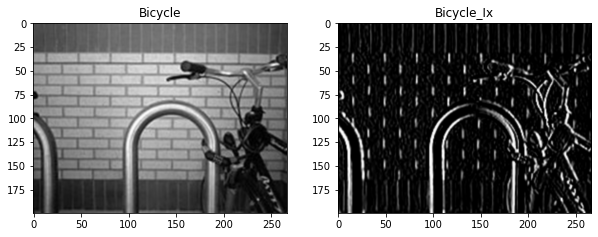

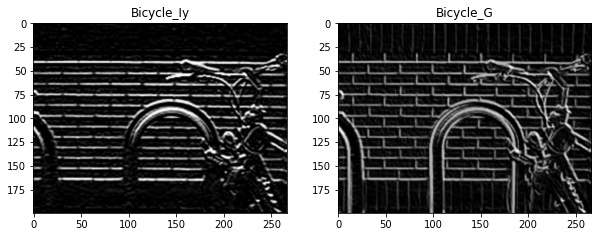

In [ ]:
request1(path,img_1)

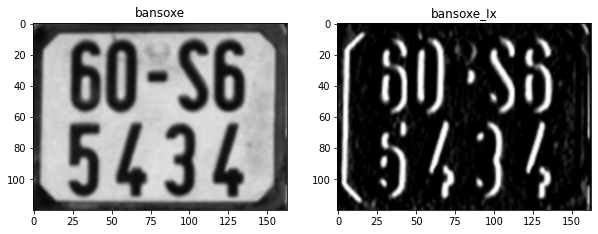

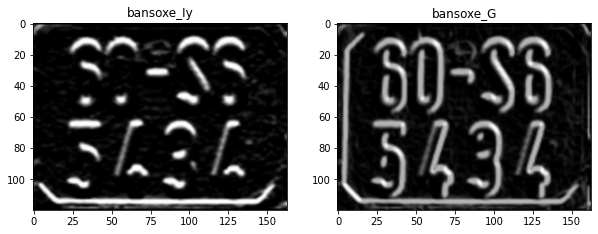

In [ ]:
request1(path,img_2)

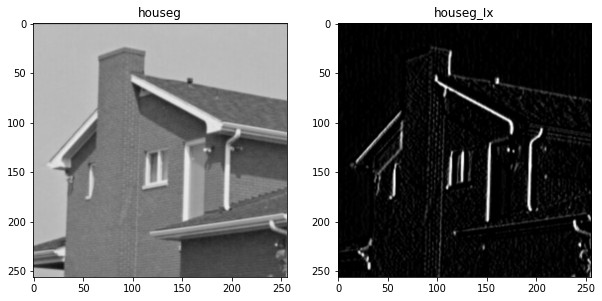

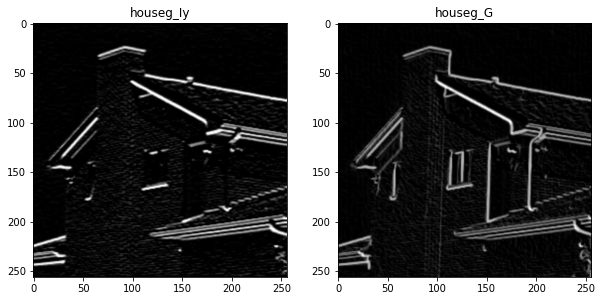

In [ ]:
request1(path,img_3)

#Yêu cầu 2:
. Viết hàm xác định đặc trưng ảnh dựa trên thông tin cạnh: theo trục x và trục y

. Tính khoảng cách euclidean giữa 2 ảnh: sử dụng thư viện của scipy

. Tính sự tương đồng theo cosin giữa 2 ảnh.

In [ ]:
def calFeartureVector(img_src):
    img_dst = img_src.copy()
    img_dst = cv2.resize(img_dst, (256, 256))
    Ix, Iy, G, theta = sobel_filters(img_dst)
    fearture = []

    for i in range(G.shape[0]):
        tmp = 0
        for j in range(G.shape[1]):
            tmp = tmp + G[i,j]
        fearture.append(tmp)
    for j in range(G.shape[1]):
        tmp = 0
        for i in range(G.shape[0]):
            tmp = tmp + G[i,j]
        fearture.append(tmp)

    return fearture

In [ ]:
def request2(path1,img1, path2,img2):
  image1 = cv2.imread(path1+img1,0)
  image2 = cv2.imread(path2+img2,0)
  fearture1 = calFeartureVector(image1)
  fearture2 = calFeartureVector(image2)
  print('euclidean distance between {} - {} is: {}'.format(img1,img2,distance.euclidean(fearture1,fearture2)))
  print('cosine-similarity between {} - {} is: {}'.format(img1,img2,1 - distance.cosine(fearture1,fearture2)))

In [ ]:
img = ['image_0814.jpg','image_0816.jpg','image_1248.jpg']

In [ ]:
request2(path,img[0],path,img[1])

euclidean distance between image_0814.jpg - image_0816.jpg is: 55432.88078311733
cosine-similarity between image_0814.jpg - image_0816.jpg is: 0.9403013260778476


In [ ]:
request2(path,img[0],path,img[2])

euclidean distance between image_0814.jpg - image_1248.jpg is: 92123.37554385341
cosine-similarity between image_0814.jpg - image_1248.jpg is: 0.8133452847890963
